## 데이터 전처리 개념과 유형

- 데이터 전처리(data preprocessing) : 머신러닝 모델에 훈련 데이터를 입력하기 전에 데이터를 가공
- 머신러닝 기초 수식 : $y=f(X)$
  - 데이터 X는 훈련 데이터(train data)와 테스트 데이터(test data)가 모두 같은 구조를 갖는 피쳐(feature)이고, $X$값을 넣으면 $y$값이 나옴
- 연속형 데이터 : 최댓값과 최솟값 차이가 피쳐보다 더 많이 나는 경우, 학습에 영향을 최소화 하기 위해 데이터의 스케일(scale)을 맞춰줌
- 기수형 데이터와 서수형 데이터 : 일반적으로 숫자로 표현되지 않기 때문에 컴퓨터가 이해할 수 있는 숫자 형태의 정보로 변형
- 결측치(missing data) : 실제로 존재하지만 데이터베이스 등에 기록되지 않는 데이터
  - 해당 데이터를 빼고 모델을 돌릴 수 없기 때문에 결측치 처리 전략을 세워 데이터를 채워 넣음
- 이상치(outlier) : 극단적으로 크거나 작은 값
  - 단순히 데이터 분포의 차이와는 다르며, 데이터 오기입이나 특이 현상 때문에 나타남

## 데이터 전처리 전략

In [1]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age': [42, np.nan, 36, 24, 73],
            'sex': ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns=['first_name', 'last_name', 'age',
                                     'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


isnull() : NaN 값이 존재할 경우 True, 그렇지 않을 경우 False 출력

In [2]:
df.isnull().sum() / len(df)  # 결측치 비율

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

### 결측치 처리하기 : 드롭
- dropna() : 드롭(drop), 결측치, NaN이 나온 열이나 행을 삭제
- 매개변수 inplace=True를 사용하거나 다른 변수에 재할당하는 것이 좋음

In [3]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


- 매개변수 how로 조건에 따라 결측치가 있는 행 또는 열 제거
    - ‘all’ 행에 있는 모든 값이 NaN일 때 해당 행을 삭제
    - ‘any’ 하나의 NaN만 있어도 삭제
- 매개변수 thresh로 결측치 아닌 데이터의 개수 조건에 따라 결측치가 있는 행 또는 열 제거

In [4]:
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [5]:
df.dropna(axis=0, thresh=1)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### 결측치 처리하기 : 채우기
- fillna() : 채우기(fill), 비어있는 값을 채움
- 일반적으로  드롭한 후에 남은 값들을 채우기 처리
- 평균, 최빈값 등 데이터의 분포를 고려해서 채움

In [6]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,0,0,0.0,0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [7]:
# 열 단위 평균값을 계산해 해당 열에만 결측값에 채우는 방식
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,NaN
2,Tina,Ali,36.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [8]:
# 성별에 따라 빈칸을 채우는 방식
df.groupby("sex")["postTestScore"].transform("mean")

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

In [9]:
df["postTestScore"].fillna(
    df.groupby("sex")["postTestScore"].transform("mean"),
    inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,NaN
2,Tina,Ali,36.0,f,3.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### 범주형 데이터 처리 : 원핫인코딩
- get_dummies() : 원핫인코딩(one-hot encoding), 범주형 데이터의 개수만큼 가변수(dummy variable)를 생성하여 존재 유무를 1 또는 0으로 표현

In [10]:
edges = pd.DataFrame({'source': [0, 1, 2],
                      'target': [2, 2, 3],
                      'weight': [3, 4, 5],
                      'color': ['red', 'blue', 'blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [11]:
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [12]:
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [13]:
# 열 이름으로 되어있는 접두어가 없는 가변수 생성
pd.get_dummies(edges["color"])

,blue,red
0,0,1
1,1,0
2,1,0


In [14]:
# 열 이름으로 되어있는 접두어가 있는 가변수 생성
pd.get_dummies(edges[["color"]])
# pd.get_dummies(edges).iloc[:, 3:]
# pd.get_dummies(edges[["color"]])
# pd.get_dummies(edges["color"], prefix="color")

,color_blue,color_red
0,0,1
1,1,0
2,1,0


- 필요에 따라 정수형을 객체로 변경해서 처리

In [15]:
weight_dict = {3: "M", 4: "L", 5: "XL"}
edges["weight_sign"] = edges["weight"].map(weight_dict)
weight_sign = pd.get_dummies(edges["weight_sign"])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [16]:
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


### 범주형 데이터로 변환 : 바인딩
- cut() : 바인딩(binding), 연속형 데이터를 범주형 데이터로 변환

In [17]:
raw_data = {
    'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks',
                 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons',
                 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
    'company': ['1st', '1st', '2nd', '2nd',
                '1st', '1st', '2nd', '2nd',
                '1st', '1st', '2nd', '2nd'],
    'name': ['Miller', 'Jacobson', 'Ali', 'Milner',
             'Cooze', 'Jacon', 'Ryaner', 'Sone',
             'Sloan', 'Piger', 'Riani', 'Ali'],
    'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
    'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df = pd.DataFrame(raw_data, columns=[
    'regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [18]:
# postTestScore에 대한 학점을 측정하는 코드를 작성
bins = [0, 25, 50, 75, 100]  # bins 정의(0-25, 25-50, 60-75, 75-100)
group_names = ['Low', 'Okay', 'Good', 'Great']

# cut : 나눌 시리즈 객체와 구간, 구간의 이름을 넣어주면 해당 값을 바인딩하여 표시해줌
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

### 피쳐 스케일링
- 스케일링(scaling) : 데이터 간 범위를 맞춤
- 최솟값-최댓값 정규화(min-max normalization) : 최솟값과 최댓값을 기준으로 0에서 1, 또는 0에서 지정 값까지로 값의 크기를 변화시킴
  - $z_i=\frac{x_i-min(x)}{max(x)-min(x)}(new_{max}-new_{min})+new_{min}$
  - $x$는 처리하고자하는 열, $x_i$는 열 하나의 값
  - $max(x)$는 해당 열의 최댓값, $min(x)$는 해당 열의 최솟값
  - $new_{max}$와 $new_{min}$은 새롭게 지정되는 값의 최댓값 또는 최솟값
- z-스코어 정규화(z-score normalization) : 기존 값을 표준 정규분포값으로 변환하여 처리
  - $z=\frac{x_i-\mu}{\sigma}$
  - μ는 $x$열의 평균값이고 σ는 표준편차

In [19]:
df = pd.DataFrame(
    {'A': [14.00, 90.20, 90.95, 96.27, 91.21],
     'B': [103.02, 107.26, 110.35, 114.23, 114.68],
     'C': ['big', 'small', 'big', 'small', 'small']})

df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [20]:
# 스케일링은 브로드캐스팅 개념으로 스칼라 값(평균값, 최댓값, 최솟값)과 벡터(열) 값 간 연산
df["A"] - df["A"].min()

0     0.00
1    76.20
2    76.95
3    82.27
4    77.21
Name: A, dtype: float64

In [21]:
# 최솟값-최댓값 정규화 방법에서 최댓값과 최솟값을 따로 구하지 않고 코드로 수식을 나타낼 수 있음
(df["A"] - df["A"].min()) / (df["A"].max() - df["A"].min())

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

In [22]:
# z-스코어 정규화 수식 역시 코드로 나타낼 수 있음
(df["B"] - df["B"].mean()) / (df["B"].std())

0   -1.405250
1   -0.540230
2    0.090174
3    0.881749
4    0.973556
Name: B, dtype: float64

## 머신러닝 프로세스와 데이터 전처리

1. 데이터를 확보한 후 데이터를 정제 및 전처리
2. 학습용과 테스트 데이터를 나눠 학습용 데이터로 학습을 실시
3. 학습 결과를 평가 지표와 비교하여 하이퍼 매개변수 변환
4. 최종적인 모델 생성하여 테스트 데이터셋으로 성능을 측정
5. 모델을 시스템에 배치하여 모델을 작동시킴

## 타이타닉 데이터 과학 솔루션
Kaggle과 같은 사이트에서 데이터 과학 대회를 해결하기 위한 일반적인 진행 단계


### 캐글 진행 단계(머신 러닝을 진행하는 단계)
대회의 Workflow는 7단계로 구성되어있다.  
1. 문제 정의  
2. 훈련, 테스트 데이터 획득  
3. 데이터 전처리(Wrangle, prepare, cleanse the data)  
4. 데이터 분석(Analyze, identify patterns, and explore the data)  
5. 문제 모델링 & 문제 예측 및 해결  
6. 시각화 및 문제 해결 단계와 최종 해결책을 보고하고 제시  
7. 결과 제출  

이 순서를 기본으로 진행하지만, 아래와 같은 예외 사례가 있음
1. 다중 Workflow 단계를 결합해 데이터 시각화를 통해 분석할 수 있음
2. 순서가 바뀔 수 있습니다. 데이터 전처리 전후로 데이터 분석 진행할 수 있음
3. 일부 과정이 중복되며, 시각화 단계를 여러 번 수행할 수 있음
4. 대회에서 데이터를 제품화하거나 서비스하기 위해 공급 단계가 필요하지 않을 수 있음 (생략 가능)


### Workflow 핵심 목표
아래와 같은 7가지 목표 안에서 Workflow가 진행
- Classifying(분류) : 샘플을 분류하고, 다양한 계층이 해결에 미치는 영향이나 상관관계를 이해하기 위해 사용
- Correlating(상관관계) : 각 특성의 상관 관계를 추측하거나 검증하는 경우가 있기 때문에 알아야 함
- Converting(변환) : 모델링 단계를 위해 일부 데이터는 범주형을 수치형으로 바꾸는 등 모델 알고리즘에 따라 변환해야할 수 있음
- Completing(완성) : 결측값이 없어야 모델 알고리즘이 잘 작동하기 때문에, 데이터 준비를 위해 결측값이 있는지 확인 
- Correcting(수정) : 데이터도 경우에 따라 오류가 있거나 노이즈가 섞일 가능성이 있다. 이런 경우 일부는 직접 수정해야 하는 경우도 있음
- Creating(만들기) : 기존 특성을 통해 새로운 특성을 만들 수도 있음
- Charting(차트) : 그래프와 차트와 같은 시각화를 통해 결과를 위한 과정을 더 직관적으로 볼 수 있으며, 필요한 작업을 알 수 있음

### 문제 정의
__승객 데이터(이름, 나이, 성별, 사회경제적 계층 등)로 를 이용한 머신러닝을 통해__  
__"타이타닉 사고에서 어떤 부류의 사람이 살아남을 가능성이 더 높은가"의 예측 모델을 만들기__ 
>  1912년 4월 15일, 그녀의 처녀 항해를 나선 널리 타이타닉호는 빙산과 충돌한 후 가라앉았습니다.  
구명보트가 탑승한 모든 사람을 태울 만큼 충분하지 않았고, 이로 인해 승객과 승무원 2224명 중 1502명이 사망했다.  
기적적으로 살아남은 사람들이 있는 반면, '어떤 그룹'의 사람들은 다른 사람들보다 더 살아남을 가능성이 높았다.

### 솔루션에서 제시한 문제 핵심
- 1912년 4월 15일 처녀 항해를 나선 타이타닉은 빙산과 충돌해 가라앉았고, 승객과 승무원 2224명 중 1052명이 사망해 32% 생존율을 보임
- 구명보트가 탑승한 모든 사람을 태울 만큼 충분하지 않았고, 이는 수많은 인명피해를 초래함
- 기적적으로 살아남는 사람들이 있는 반면, 여성/어린이/상류충과 같은 몇몇 사람들은 다른 사람들보다 살아남을 가능성이 더 높음  
    - 영화 '타이타닉'에서는 여성과 아이들을 중심으로 구조보트에 태우는 장면이 있음

문제 정의에 따라 분류, 회귀 등의 목적을 알 수 있기 때문에 __필요한 라이브러리를 미리 호출__

In [23]:
# machine learning : 머신러닝을 위한 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

# data analysis and wrangling : 데이터 분석 및 전처리를 위한 라이브러리
import pandas as pd
import numpy as np

# visualization : 데이터 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### 훈련, 테스트 데이터 획득
데이터의 경우 Python의 Pandas 패키지를 사용하는 것이 좋음
훈련과 테스트 데이터의 경우 전처리 과정이 필요한 경우가 있기 때문에 미리 묶어서 관리할 수 있음

In [24]:
# train과 test는 똑같이 전처리 하기 때문에 하나로 묶어서 반복문을 통해 처리 하는 것이 유용
train_df = pd.read_csv('../Data/titanic/train.csv')
test_df = pd.read_csv('../Data/titanic/test.csv')
combine = [train_df, test_df]

### 데이터 분석 : 기본 데이터

In [25]:
# 여러 특성들을 확인, 12가지 특성이 있음
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


__범주형 데이터 : 몇 개의 범주로 나누어진 데이터__
- 명목형 : 성별, 혈액형, 등 단순한 분류 (Survived, Sex, Embarked(승선장))
- 순서형 : 개개의 값들은 이산적이며 순서 관계가 존재하는 자료 (Pclass(좌석 등급))
 
__수치형 데이터 : 연속적인 값을 가지는 데이터로 숫자로 표시__
- 이산형 : 이산적인 값을 갖는 데이터 (SibSp(형제자매 또는 배우자), Parch(부모님) / 한 명, 두 명, 세 명)
- 연속형 : 연속적인 값을 갖는 데이터 (Age, Fare(티켓 가격) / 나이 또는 키)

__혼합형 데이터 : 숫자, 알파벳 등으로 이뤄진 데이터__
- 특성을 찾기 어려우며, 수정을 통해 원하는 정보를 얻어야 한다. (Ticket, Cabin)

In [26]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__문자열로 이루어진 데이터__
매우 큰 데이터에서는 오타와 같이 사소한 정보는 발견하지 못할 수 있으나, 비교적 작은 데이터에서는 처리가 가능 (Name 등)

__데이터 공백, Null, 빈 값__
반드시 해결해야하는 부분으로, 머신러닝에 있어서 큰 오차가 생길 수 있어 정보를 점검해 찾아야 함  
빈 값에 대한 추측은 다양할 수 있으며, 수치의 경우 최솟값, 중앙값, 평균 등으로 채우거나 범주의 경우 최빈값으로 채울 수 있음

__데이터가 들어오는 형태__
범주형 데이터도 수치로 들어올 수 있고, 머신러닝 함수들에 입력하기 전에 더 좋은 형태로 전처리를 통해 바꿔야하기 때문에 중요한 요소
>7개의 integer of float  
5개의 string (object)  

In [27]:
train_df.tail()
train_df.info()  # info를 통해 데이터의 특성 확인
print('_' * 40)
test_df.info()

# RangeIndex: 891 entries, 0 to 890 : 전체 데이터수 891개 (0 ~ 890)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

__수치형 데이터 분포 : 분포를 살펴보는 것은 데이터에 대한 이해를 높임__
- 데이터에 대한 분포를 살피는 것은 데이터에 대한 이해를 높일 수 있음
- 891의 샘플은 총 인원의 40%
- Survived는 0과 1로 이루어진 범주형 데이터
- 대부분의 승객은 부모 또는 자식과 함께 타지 않음
- 30%의 승객은 형제자매, 배우자와 함께 탑승
- 요금(Fares)의 경우, 매우 적은 수의 승객이 512$보다 많이 지불
- 나이가 많은 승객(65~80)의 수는 1% 미만

In [28]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__범주형 데이터의 분포__
.describe() 메서드를 통해 데이터에 대한 통계를 살피거나, 매개변수 세팅을 통해 범주형 데이터도 분석할 수 있음
- Name 값은 모두 다름
- Sex 값은 577/891로 약 65%를 차지
- Cabin 값은 양도 적고 중복이 많은 것으로 보아, 일부 손님들이 호실을 공유한 것으로 보임
- Ticket값은 681개가 unique인 것은 중복이 있다는 의미
- Embarked(승선)값은 총 3개의 종류가 있고, S가 제일 많음

In [29]:
train_df.describe(include=['O'])  # include=['O'] : Object형의 Dtype를 읽는다.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 데이터 분석에 기반한 가정
지금까지의 데이터 분석을 바탕으로 다음과 같은 가정을 할 수 있음

__Correlating__
1. 각 특성이 생존 여부에 미치는 영향을 확인
2. 초안과 모델링된 상관관계가 일치하는지 확인

__Completing__
1. Age는 분명 생존 여부와 관련한 특성이기 때문에 채워야 함
2. Embarked도 생존 여부와 관계 있다고 보고, 다른 특성과 연관 있기 때문에 채워 넣음

__Correcting__
1. Ticket의 경우 22%나 중복되었고, 생존여부와 관계 없을 수 있으므로 특성에서 제거
2. Cabin은 Null값이 많기 때문에 제외
3. PassengerId는 훈련 데이터에서는 생존 여부와 관계없으니 제거
4. Name은 형식이 다양하고, 생존 여부와 직결된 관계가 없으니 제거

__Creating__
1. Family라는 특성을 Parch와 SibSp 값을 합쳐 만듦
2. name 특성을 수정해 Title(Mr, Mrs)이라는 특성을 만듦
3. Age 특성을 수치형-연속형 데이터에서 Age bands, 즉 나이대라는 범주형 데이터 만듦
4. Fare 범위로 새로운 특성을 만들어 분석

__Classifying__
> 이전에 서술된 내용들을 통해 다음과 같은 가정을 추가할 수 있음
1. Women (Sex=female)이 더 많이 생존
2. Children (Age<?)이 더 많이 생존
3. The upper-class의 1등석(Pclass=1) 탄 승객이 더 많이 생존

__pivoting features로 분석하기__
- 지금은 Null이나 NaN 등 빈 값이 없는 특성값 대해서만 할 수 있음
- Pclass : Pclass=1인 승객에 대해서 생존 확률이 0.5보다 높다. 이는 모델에 특성에 넣으면 됨
- Sex : 실제로 여성 승객이 생존 확률이 74%로 높은 수치
- Sibsp and Parch : 다음 두 특성은 상관관계를 찾기 어렵기 때문에 특성을 합쳐 새로운 성질을 찾아야 함

In [30]:
# Survived 특성과 묶어서(groupby), as_index=False 인덱스 지정 여부 확인, 평균을 낸 뒤 Survived로 생존율 정렬
train_df[['Pclass', 'Survived']].groupby(
    ['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [31]:
train_df[["Sex", "Survived"]].groupby(
    ['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [32]:
train_df[["SibSp", "Survived"]].groupby(
    ['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [33]:
# 정확한 분류할 수 있는 값이 없기 때문에 SibSp와 Parch를 합쳐 새로운 값으로 만드는 것을 고려
train_df[["Parch", "Survived"]].groupby(
    ['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 시각화를 통한 데이터 분석
__수치형 특성의 상관관계__  
- 히스토그램 차트는 연속형 수치형 변수를 분석하는 데 매우 유용  
- 연속형 데이터를 사용자 지정 범위에 따라 차트로 나타내어, 분포를 통해 패턴 또는 유용한 정보를 추출할 수 있음  
- Observations
  - 4세 이하는 생존 확률이 높음
  - 최고령 승객(age = 80)은 살음
  - 15~25세 사이 사람들은 생존하지 못한 사람이 많음
  - 대부분의 승객은 15~35세
- Decisions
  - Age 특성은 모델에 필요함
  - Age에서 NaN값을 채워야 함
  - 나이를 범위에 따라 그룹화하여야 함 (연속형 -> 범주형)

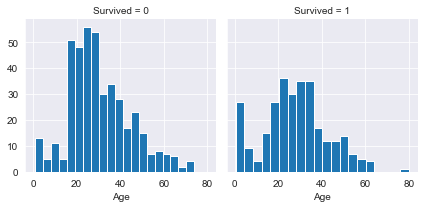

In [34]:
# seaborn 라이브러리에 있는 FacetGrid : Survived 기준으로 column을 나누고, Age 기준으로 히스토그램을 그린다. bins는 등분간의 간격
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)  # 나중에 머신러닝 모델에 나이별 그룹을 두어 입력하는 것이 좋음

__수치형과 서수형 특성의 상관관계__
- 1개의 그래프로도 여러 특성을 조합해 상관 관계를 확인할 수 있음
- Observations
  - Pclass=3인 승객수가 많으나, 대다수가 생존하지 못함
  - Pclass=2, Pclass=3에서 영아 승객은 대부분 생존
  - Pclass=1인 승객들은 대부분 생존  
  - Pclass에 따라 승객의 나이 분포는 다름
- Decisions
  - Pclass는 모델에 필요한 특성

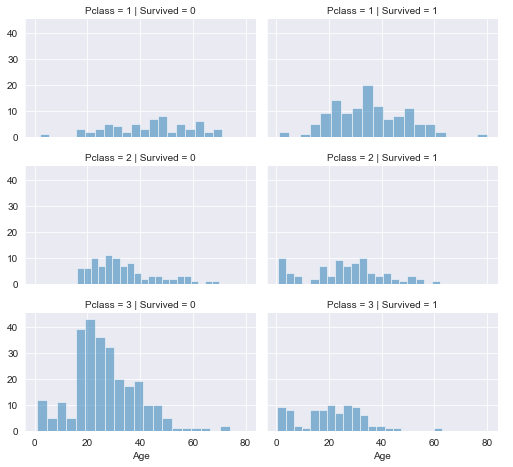

In [35]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived'), height와 aspect는 크기
grid = sns.FacetGrid(train_df, col='Survived',
                     row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

__범주형 특성의 상관관계__ 
- Observations
  - 여성 승객은 높은 비율로 생존
  - Embarked=C인 남성 승객은 예외적으로 생존 비율이 높으나, Pclass와의 상관관계일 수 있으며, 특성들은 꼭 Survived와 직접적으로 연관될 필요가 없음 
- Decisions
  - Sex 특성은 모델에 필요함
  - Embarked 특성은 빈 부분을 채워야하고, 모델에 있어 필요한 특성

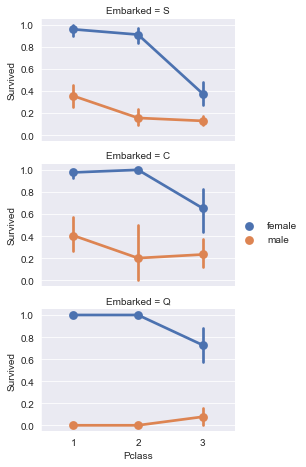

In [36]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',
         order=[1, 2, 3], hue_order=["female", "male"])
grid.add_legend()

__범주형과 수치형 특성의 상관 관계__
- Observations
  - 높은 요금을 낸 승객은 생존율이 더 높음
  - 생존율과 Embarked의 상관관계
- Decisions
  - Fare 특성의 분류를 고려

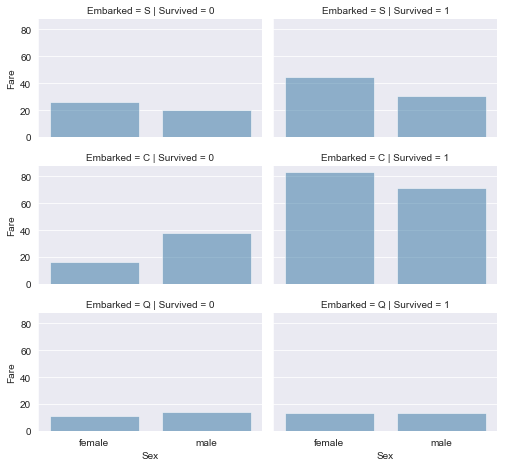

In [37]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked',
                     col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5,
         ci=None, order=['female', 'male'])
grid.add_legend()

### 데이터 처리하기(데이터 전처리)
__특성 제거__
    - 더 적은 데이터를 사용하면 속도와 분석 면에서 더 빠르고 분석하기 쉬움
    - Cabin Ticket의 특성을 제거하고, 훈련 데이터와 테스트 데이터를 모두 제거해야 함

In [38]:
print("Before", train_df.shape, test_df.shape,
      combine[0].shape, combine[1].shape)

# 불필요한 Cabin과 Ticket 열을 제거
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


__기준 특성에서 새로운 특성 만들기__
- Name 특성은 일부 Advanced 커널에서 다루는 요소입니다.
- Title이라는 특성을 만들고, 정규 표현식을 이용해 Name에서 .앞까지 자른다.
- Observation
    - 대부분의 Title은 Age 범위로 그룹을 정확하게 묶습니다.
    - Title에 따른 Age 범위의 생존율은 약간 다릅니다.
    - 일부 Title은 대부분 생존했거나, 대부분 생존하지 않았습니다.
- Decision
    - Title 특성을 사용하도록 합시다.

In [39]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [40]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [41]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [42]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

__범주형 특성 전환하기__
  - 이제 문자열로 이루어진 특성을 수치형으로 변환
  - 대부분의 알고리즘은 수치형을 입력으로 받기에 변환이 필요
  - Sex 특성에서 female = 1 / male = 0으로 변환할 수 있음

In [43]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


__수치형 연속형 특성 채우기__
    - 빈 부분의 데이터를 예측하고 채움  
    - 수치형 - 연속형 특성을 채우는 3가지 방법을 보도록 함
    1. 평균과 분산을 이용한 랜덤  
    2. 각 특성의 중앙값으로 사용(Pclass, Gender)  
    3. 중앙값을 기준으로 평균과 분산 사용
    - 이 분석에서는 2번을 이용

C:\Users\Laeti\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


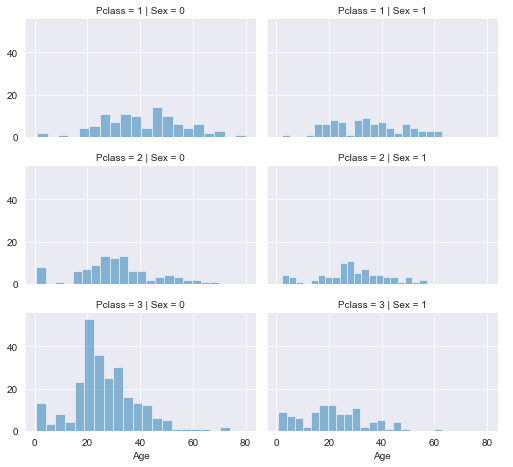

In [44]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [45]:
# Pclass와 Sex 특성을 이용해 Age를 예상하는 코드 구성
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [46]:
# Sex(0,1)과 Pclass(1,2,3)의 총 6가지 조합에 대해 구함
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) &
                               (dataset['Pclass'] == j + 1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1),
                        'Age'] = guess_ages[i, j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [47]:
# 나이대를 연령대별로 묶어서 생존율과 연결
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [48]:
#Age를 범주형으로 변환
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [49]:
# AgeBand 특성을 지우고 train과 test 데이터프레임 결합
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


__기존 특성을 합쳐 새로운 특성 만들기__
    - FamilySize 특성을 Parch와 SibSp를 이용하여 만듦

In [50]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',
                                                                                                ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [51]:
#혼자인 IsAlone이라는 특성을 만듦
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [52]:
# IsAlone을 남기고 Parch, SibSp, FamilySize를 제거
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [53]:
# Pclass와 Age 특성을 합친 가상 특성을 만듦
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


- 범주형 특성 채우기
  - Embarked 특성은 S, Q, C값을 가진다. 하지만 훈련 데이터셋에 총 2개의 값이 Null값이기 때문에 최빈값으로 채움

In [54]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [55]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',
                                                                                            ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


- 범주형 특성을 수치형으로 변환

In [56]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


- 수치형 특성 빠르게 채우고 변환
    - 비어있는 한 명을 코드 한 줄로 빠르게 채움

In [57]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [58]:
# Fare 특성 확인
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand',
                                                                                            ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [59]:
# Fare 특성을 범주형으로 놓음
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [60]:
# 다시 한 번 테스트 데이터셋 확인
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


### 문제 모델링 & 문제 예측 및 해결
- 예측 모델 알고리즘은 60개가 넘기 때문에 효율이 좋은 알고리즘을 이해하고 선택할 줄 알아야 함
- 분류 문제는 지도학습에 속하는 문제
  - Logistic Regression
  - KNN or k-Nearest Neighbors
  - Support Vector Machines
  - Naive Bayes classifier
  - Decision Tree
  - Random Forest
  - Perceptron
  - Artificial neural network
  - RVM or Relevance Vector Machine

In [61]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

- Logistic Regression
  - 시작 단계에서 돌려보기 좋은 모델
  - 각 특성이 미치는 영향을 알아볼 수 있음

In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(Y_pred)
print(acc_log)

coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

# 결정 함수에서 사용되는 계수 값들을 알 수 있음
coeff_df.sort_values(by='Correlation', ascending=False)
# 양의 계수는 log-odds를 증가해 확률을 증가시키고, 음의 계수는 log-odds가 감소해 확률을 감소  

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
81.37


,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


- Support Vector Machine
  - SVM이라고 불리는 지도학습 모델을 사용
  - 분류와 회귀에 모두 사용되는 알고리즘

In [63]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(Y_pred)
print(acc_svc)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
82.83


- K-Nearest Neighbors 알고리즘(K-NN)
  - 패턴 인식으로 데이터 속성을 파악해 가장 가까운 이웃들을 묶는 데이터 알고리즘

In [64]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(Y_pred)
print(acc_knn)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1]
82.83


- naive Bayes classifier

In [65]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(Y_pred)
print(acc_gaussian)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 0 0 1 0 0 1]
76.88


- Perceptron

In [66]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(Y_pred)
print(acc_perceptron)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 0]
79.35


- Linear SVC

In [67]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(Y_pred)
print(acc_linear_svc)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
79.8


C:\Users\Laeti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


- Stochastic Gradient Descent

In [68]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(Y_pred)
print(acc_sgd)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
78.79


- Decision Tree

In [69]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(Y_pred)
print(acc_decision_tree)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1]
86.64


- Random Forest

In [70]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(Y_pred)
print(acc_random_forest)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1]
86.64
